In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy.stats import zscore
from scipy.stats import jarque_bera
from statsmodels.tsa.stattools import adfuller

In [17]:
borrows = pd.read_pickle("borrow.pkl")
depo = pd.read_pickle("deposit.pkl")


In [39]:
borrows['volume'] = borrows['amount'] * borrows['assetPriceUSD']
depo['volume'] = depo['amount'] * depo['assetPriceUSD']
borrows.set_index('datetime')
depo.set_index('datetime')

,Unnamed: 0,action,amount,assetPriceUSD,id,timestamp,txHash,caller_id,pool,reserve_decimals,reserve_name,underlying_asset,user_id,volume,asset_group
datetime,,,,,,,,,,,,,,,
2023-01-27 08:00:11,807,Supply,0.040000,1585.166200,16496817:398:0xa4a5f3993fd60bd01665f8389c1c5cd...,1674806411,0xa4a5f3993fd60bd01665f8389c1c5cded8cfed0007de...,0xd322a49006fc828f9b5b37ab215f99b4e5cab19c,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7fa5195595efe0dfbc79f03303448af3fbe4ea91,63.406648,Wrapped Ether
2023-01-27 08:20:47,806,Supply,0.001000,1585.870000,16496920:155:0x55dad875c908b12f0e2c0ce3e102951...,1674807647,0x55dad875c908b12f0e2c0ce3e102951936b6053f11f9...,0xd322a49006fc828f9b5b37ab215f99b4e5cab19c,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe4217040c894e8873ee19d675b6d0eec992c2c0d,1.585870,Wrapped Ether
2023-01-27 08:22:23,805,Supply,1.584767,1.000158,16496928:62:0x4a88a8c6a43b5df2ee59ebcf266225fb...,1674807743,0x4a88a8c6a43b5df2ee59ebcf266225fbc5b876f20200...,0x872fbcb1b582e8cd0d0dd4327fbfa0b4c2730995,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Dai Stablecoin,0x6b175474e89094c44da98b954eedeac495271d0f,0xe4217040c894e8873ee19d675b6d0eec992c2c0d,1.585017,Dai Stablecoin
2023-01-27 08:24:35,804,Supply,0.001000,1585.870000,16496938:477:0x8396326ac5cb82d02eb0e497e538f38...,1674807875,0x8396326ac5cb82d02eb0e497e538f383b3408562d302...,0xd322a49006fc828f9b5b37ab215f99b4e5cab19c,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe4217040c894e8873ee19d675b6d0eec992c2c0d,1.585870,Wrapped Ether
2023-01-27 08:33:59,803,Supply,0.000100,1585.870000,16496985:155:0x0d146b0678e24a49306a717e829fe73...,1674808439,0x0d146b0678e24a49306a717e829fe7313cf2ae3a26a7...,0xb748952c7bc638f31775245964707bcc5ddfabfc,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xd68a2231953f547df2809f1f6e7c17e6694be8ef,0.158587,Wrapped Ether
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:52:59,4,Supply,0.300000,1782.440000,21525855:46:0x7dcb838e9581032eab63eed19ce2b57d...,1735689179,0x7dcb838e9581032eab63eed19ce2b57d42a91ab972dc...,0xa434d495249abe33e031fe71a969b81f3c07950d,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x547564a93e1fccc1a2dfc4d248d8c8aaad6b65e4,534.732000,Wrapped Ether
2024-12-31 23:56:23,3,Supply,7.390727,1782.440000,21525872:0:0xb1927a22d0cc3202587e6acf3a982e744...,1735689383,0xb1927a22d0cc3202587e6acf3a982e744d9b4b5c57a3...,0x3bfe65f217df9ad7358698580aeb47f692241c48,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3bfe65f217df9ad7358698580aeb47f692241c48,13173.528271,Wrapped Ether
2024-12-31 23:57:11,2,Supply,0.090000,1782.440000,21525876:5:0xfa6aee186124521ea0b680ec1d65d47b3...,1735689431,0xfa6aee186124521ea0b680ec1d65d47b39a042adc637...,0xa434d495249abe33e031fe71a969b81f3c07950d,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x93712c8857e38fc5fed33b81e4f6a12754db27c5,160.419600,Wrapped Ether


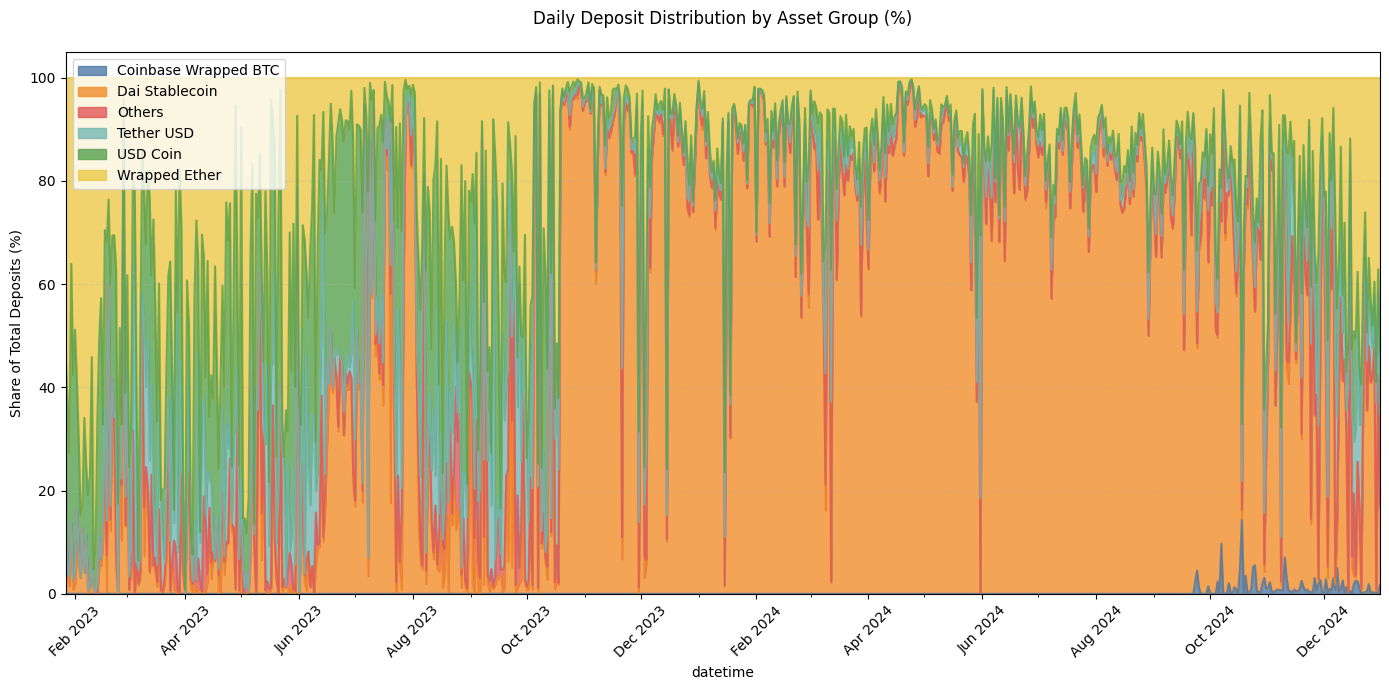

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Top 5 pools
top_pools = depo.groupby('reserve_name')['volume'].sum().nlargest(5).index.tolist()
depo['asset_group'] = depo['reserve_name'].where(depo['reserve_name'].isin(top_pools), 'Others')

# Regroupement par jour
daily_deposits = depo.groupby([pd.Grouper(key='datetime', freq='D'), 'asset_group'])['volume'].sum().unstack(fill_value=0)

colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948']


# === GRAPHE 2 : Répartition en pourcentage ===
fig, ax = plt.subplots(figsize=(14, 7))
percent_deposits = daily_deposits.divide(daily_deposits.sum(axis=1), axis=0) * 100
percent_deposits.plot.area(ax=ax, stacked=True, color=colors, alpha=0.8)

ax.set_title('Daily Deposit Distribution by Asset Group (%)', pad=20)
ax.set_ylabel('Share of Total Deposits (%)')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

ax.legend(loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()





C:\Users\Dell\AppData\Local\Temp\ipykernel_19880\1132995900.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_borrow = borrows.groupby([pd.Grouper(key='datetime', freq='M'), 'asset_group'])['volume'].sum().unstack(fill_value=0)


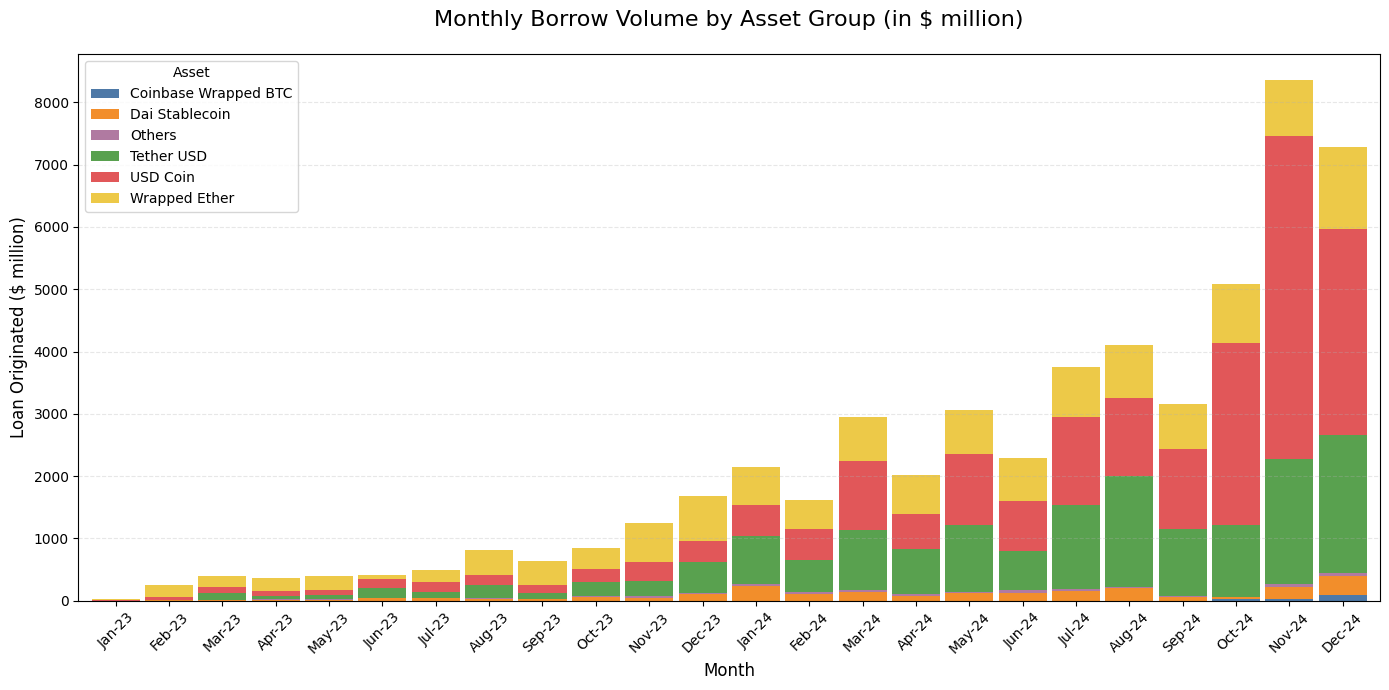

In [27]:
top_tokens = borrows.groupby('reserve_name')['volume'].sum().nlargest(5).index.tolist()
borrows['asset_group'] = borrows['reserve_name'].where(borrows['reserve_name'].isin(top_tokens), 'Others')
monthly_borrow = borrows.groupby([pd.Grouper(key='datetime', freq='M'), 'asset_group'])['volume'].sum().unstack(fill_value=0)

# Étape 3 : Couleurs professionnelles similaires à l’article
colors = {
    'Dai Stablecoin': '#F28E2B',   
    'USD Coin': '#E15759',      
    'Tether USD': '#59A14F',     
    'Wrapped Ether': '#EDC948',       
    'Coinbase Wrapped BTC': '#4E79A7',      
    'Others': '#B07AA1'    
}
# Assure-toi que tous les tokens ont une couleur
color_list = [colors.get(col, '#888888') for col in monthly_borrow.columns]

# Étape 4 : Affichage du bar chart empilé
fig, ax = plt.subplots(figsize=(14, 7))
monthly_borrow = monthly_borrow / 1e6  # Convert to millions
monthly_borrow.plot(kind='bar', stacked=True, ax=ax, color=color_list, width=0.9)

ax.set_title('Monthly Borrow Volume by Asset Group (in $ million)', fontsize=16, pad=20)
ax.set_ylabel('Loan Originated ($ million)', fontsize=12)
ax.set_xlabel('Month', fontsize=12)

# Format des dates sur l'axe X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_xticks(range(len(monthly_borrow.index)))
ax.set_xticklabels([dt.strftime('%b-%y') for dt in monthly_borrow.index], rotation=45)

# Légende et grille
ax.legend(title='Asset', loc='upper left', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


In [25]:
df=pd.concat([depo, borrows], axis=0, ignore_index=True)
df.sort_values(by='datetime')


,Unnamed: 0,action,amount,assetPriceUSD,id,timestamp,txHash,caller_id,pool,reserve_decimals,reserve_name,underlying_asset,user_id,datetime,volume,asset_group
0,807,Supply,0.040000,1585.166200,16496817:398:0xa4a5f3993fd60bd01665f8389c1c5cd...,1674806411,0xa4a5f3993fd60bd01665f8389c1c5cded8cfed0007de...,0xd322a49006fc828f9b5b37ab215f99b4e5cab19c,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7fa5195595efe0dfbc79f03303448af3fbe4ea91,2023-01-27 08:00:11,63.406648,Wrapped Ether
1,806,Supply,0.001000,1585.870000,16496920:155:0x55dad875c908b12f0e2c0ce3e102951...,1674807647,0x55dad875c908b12f0e2c0ce3e102951936b6053f11f9...,0xd322a49006fc828f9b5b37ab215f99b4e5cab19c,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe4217040c894e8873ee19d675b6d0eec992c2c0d,2023-01-27 08:20:47,1.585870,Wrapped Ether
2,805,Supply,1.584767,1.000158,16496928:62:0x4a88a8c6a43b5df2ee59ebcf266225fb...,1674807743,0x4a88a8c6a43b5df2ee59ebcf266225fbc5b876f20200...,0x872fbcb1b582e8cd0d0dd4327fbfa0b4c2730995,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Dai Stablecoin,0x6b175474e89094c44da98b954eedeac495271d0f,0xe4217040c894e8873ee19d675b6d0eec992c2c0d,2023-01-27 08:22:23,1.585017,Dai Stablecoin
3,804,Supply,0.001000,1585.870000,16496938:477:0x8396326ac5cb82d02eb0e497e538f38...,1674807875,0x8396326ac5cb82d02eb0e497e538f383b3408562d302...,0xd322a49006fc828f9b5b37ab215f99b4e5cab19c,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe4217040c894e8873ee19d675b6d0eec992c2c0d,2023-01-27 08:24:35,1.585870,Wrapped Ether
295190,354,Borrow,1.000000,1.000158,16496939:64:0xa7b2a6f0161a0f7003261a8a05bcea5c...,1674807887,0xa7b2a6f0161a0f7003261a8a05bcea5cc476ce30a446...,0x7fa5195595efe0dfbc79f03303448af3fbe4ea91,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Dai Stablecoin,0x6b175474e89094c44da98b954eedeac495271d0f,0x7fa5195595efe0dfbc79f03303448af3fbe4ea91,2023-01-27 08:24:47,1.000158,Dai Stablecoin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295186,3,Supply,7.390727,1782.440000,21525872:0:0xb1927a22d0cc3202587e6acf3a982e744...,1735689383,0xb1927a22d0cc3202587e6acf3a982e744d9b4b5c57a3...,0x3bfe65f217df9ad7358698580aeb47f692241c48,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3bfe65f217df9ad7358698580aeb47f692241c48,2024-12-31 23:56:23,13173.528271,Wrapped Ether
295187,2,Supply,0.090000,1782.440000,21525876:5:0xfa6aee186124521ea0b680ec1d65d47b3...,1735689431,0xfa6aee186124521ea0b680ec1d65d47b39a042adc637...,0xa434d495249abe33e031fe71a969b81f3c07950d,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x93712c8857e38fc5fed33b81e4f6a12754db27c5,2024-12-31 23:57:11,160.419600,Wrapped Ether
295188,1,Supply,4014.000000,1.000212,21525882:157:0x732526355af99f6a2b0dbe4477f3e32...,1735689503,0x732526355af99f6a2b0dbe4477f3e32fbb72b8829739...,0x84f05c2a14f47ccda510df98364877e5b2726ad2,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,6,Tether USD,0xdac17f958d2ee523a2206206994597c13d831ec7,0x84f05c2a14f47ccda510df98364877e5b2726ad2,2024-12-31 23:58:23,4014.852052,Tether USD
295189,0,Supply,550.000000,1782.440000,21525888:52:0x0464eeb56d65def3cdb92d4c41344869...,1735689575,0x0464eeb56d65def3cdb92d4c413448690e4754eb403f...,0xa434d495249abe33e031fe71a969b81f3c07950d,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,18,Wrapped Ether,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x30848a44eb12472c9397396c27840e74251f7e31,2024-12-31 23:59:35,980342.000000,Wrapped Ether


In [49]:
top_depo=depo[depo['reserve_name'].isin(['Wrapped Ether','Dai Stablecoin', 'USD Coin', 'Tether USD', 'Coinbase Wrapped BTC'])]
top_borrow=borrows[borrows['reserve_name'].isin(['Wrapped Ether','Dai Stablecoin', 'USD Coin', 'Tether USD', 'Coinbase Wrapped BTC'])]

In [51]:
daily_depo = top_depo.groupby([pd.Grouper(key='datetime', freq='D'), 'reserve_name'])['volume'].sum().unstack(fill_value=0)

# Emprunts quotidiens par asset
daily_borrow = top_borrow.groupby([pd.Grouper(key='datetime', freq='D'), 'reserve_name'])['volume'].sum().unstack(fill_value=0)

daily_borrow.head()

reserve_name,Coinbase Wrapped BTC,Dai Stablecoin,Tether USD,USD Coin,Wrapped Ether
datetime,,,,,
2023-01-27,0.0,268461.893889,0.0,7.218136e+05,1.142408e+06
2023-01-28,0.0,7624.478464,0.0,1.906532e+06,2.920226e+06
2023-01-29,0.0,153665.246510,0.0,1.987241e+06,2.678076e+06
2023-01-30,0.0,87101.795109,0.0,2.582882e+06,3.263095e+06
2023-01-31,0.0,395789.853936,0.0,2.439056e+06,1.154203e+06


In [52]:
common_index = daily_depo.index.intersection(daily_borrow.index)
daily_depo = daily_depo.loc[common_index]
daily_borrow = daily_borrow.loc[common_index]

# Maintenant, créer une matrice croisée Dépôt (x) Emprunt
corr_matrix = daily_depo.corrwith(daily_borrow, axis=0, method='pearson')

# OU pour toutes les paires (plus complet) :
import numpy as np
cross_corr = pd.DataFrame(
    np.corrcoef(daily_depo.T, daily_borrow.T)[:len(daily_depo.columns), len(daily_depo.columns):],
    index=daily_depo.columns,
    columns=daily_borrow.columns
)

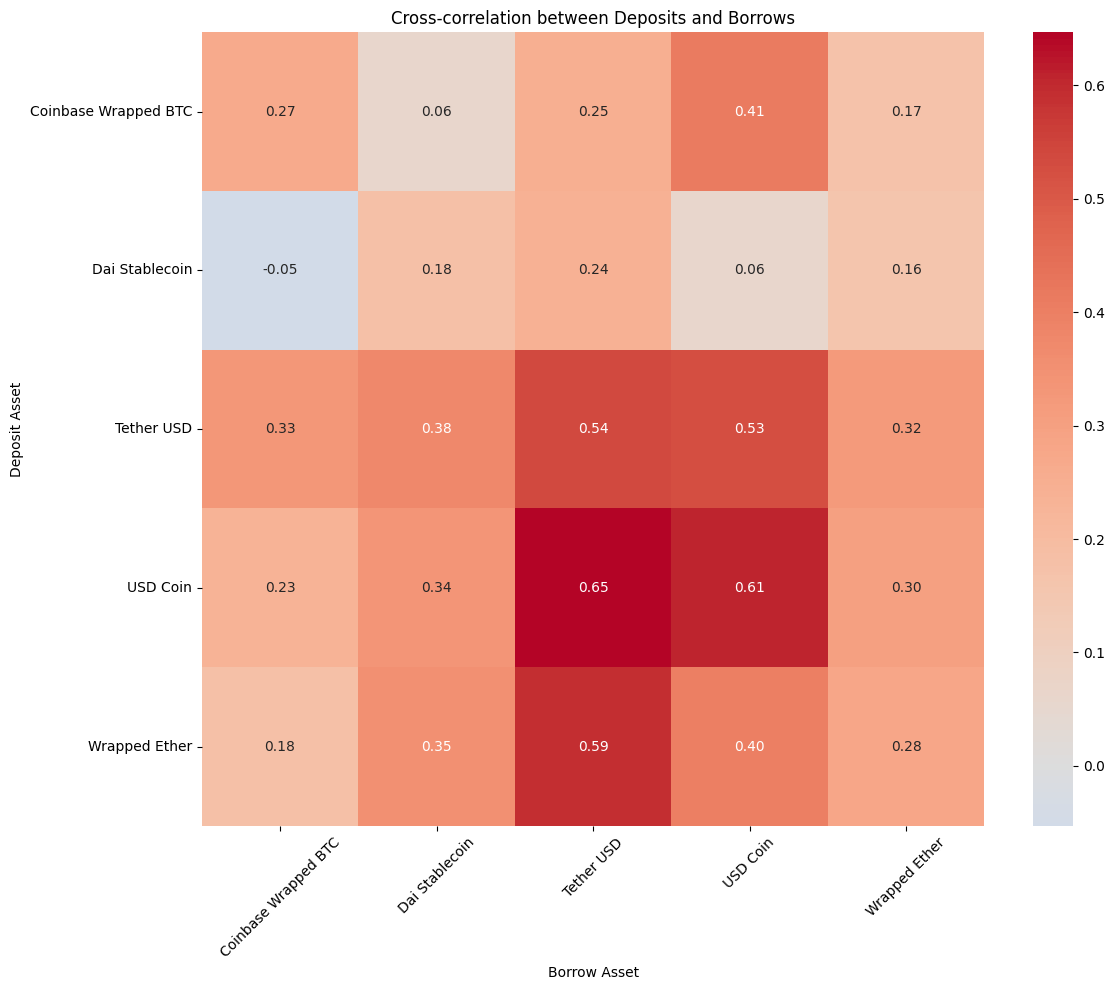

In [53]:

plt.figure(figsize=(12, 10))
sns.heatmap(cross_corr, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Cross-correlation between Deposits and Borrows')
plt.xlabel('Borrow Asset')
plt.ylabel('Deposit Asset')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [60]:
df_cry = pd.read_pickle("hourly.pkl")
df_feat= pd.read_pickle("reserve_features.pkl")
df_ETH=df_cry[df_cry['reserve_name']=='Wrapped Ether']
feat_ETH=df_feat[df_feat['reserve_name']=='Wrapped Ether']
df=pd.merge(df_ETH, feat_ETH, left_on='datetime', right_on='regular_datetime')
cols=['datetime'] + [col for col in df if col!='datetime']
df=df[cols]



In [68]:
df['datetime']=pd.to_datetime(df['datetime'])
df.set_index('datetime').sort_index
df.head()

,datetime,Unnamed: 0_x,blockNumber,timestamp_hours,id,inputTokenPriceUSD,outputTokenPriceUSD,snapshot_timestamp,reserve_name_x,protocol_name,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name_y,reserve_pool,true_value
0,2023-01-27 08:00:00+00:00,448,16497089,465224,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84819...,1585.870000,NaN,1674809687,Wrapped Ether,Aave v3,...,3.04210,0.0,0.041100,0.013510,1.000017,0.010642,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
1,2023-01-27 09:00:00+00:00,446,16497355,465225,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84919...,1581.138800,NaN,1674812903,Wrapped Ether,Aave v3,...,3.53210,0.0,0.499991,0.141559,1.000018,0.016724,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
2,2023-01-27 10:00:00+00:00,441,16497705,465226,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84a19...,1576.713700,NaN,1674817115,Wrapped Ether,Aave v3,...,30.05012,0.0,0.499991,0.016639,1.000021,0.010790,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
3,2023-01-27 11:00:00+00:00,439,16497885,465227,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84b19...,1576.713700,NaN,1674819287,Wrapped Ether,Aave v3,...,34.05012,0.0,0.499991,0.014684,1.000021,0.010698,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
4,2023-01-27 12:00:00+00:00,433,16498232,465228,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84c19...,1577.070038,NaN,1674823487,Wrapped Ether,Aave v3,...,77.21255,0.0,18.431338,0.238714,1.000023,0.021339,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0


In [85]:
daily = df.groupby(pd.Grouper(key='datetime', freq='D'))['inputTokenPriceUSD'].mean()
daily_df = daily.to_frame()
daily_df.tail()

,inputTokenPriceUSD
datetime,
2024-12-27 00:00:00+00:00,3357.306054
2024-12-28 00:00:00+00:00,3361.969897
2024-12-29 00:00:00+00:00,3374.287934
2024-12-30 00:00:00+00:00,3381.694919
2024-12-31 00:00:00+00:00,3363.754159


In [164]:
S=daily_df

In [165]:
r = np.log(daily_df['inputTokenPriceUSD'] / daily_df['inputTokenPriceUSD'].shift(1)).dropna()


In [159]:
event_dates = {
    'Shapella': '2023-04-12',
    'L2 Surge': '2023-08-16',
    'Binance Settlement': '2023-11-09',
    'BTC ETF Approved': '2024-01-10',
    'Dencun Upgrade': '2024-03-13',
    'ETH ETF Spec': '2024-05-23',
    'Mt. Gox Repayments': '2024-06-24'
}



C:\Users\Dell\AppData\Local\Temp\ipykernel_19880\1377435185.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_t = float(S.iloc[t])
C:\Users\Dell\AppData\Local\Temp\ipykernel_19880\1377435185.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_actual = float(S.iloc[t+1])
C:\Users\Dell\AppData\Local\Temp\ipykernel_19880\1377435185.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  naive_errors.append((float(S.iloc[t]) - float(S.iloc[t+1]))**2)


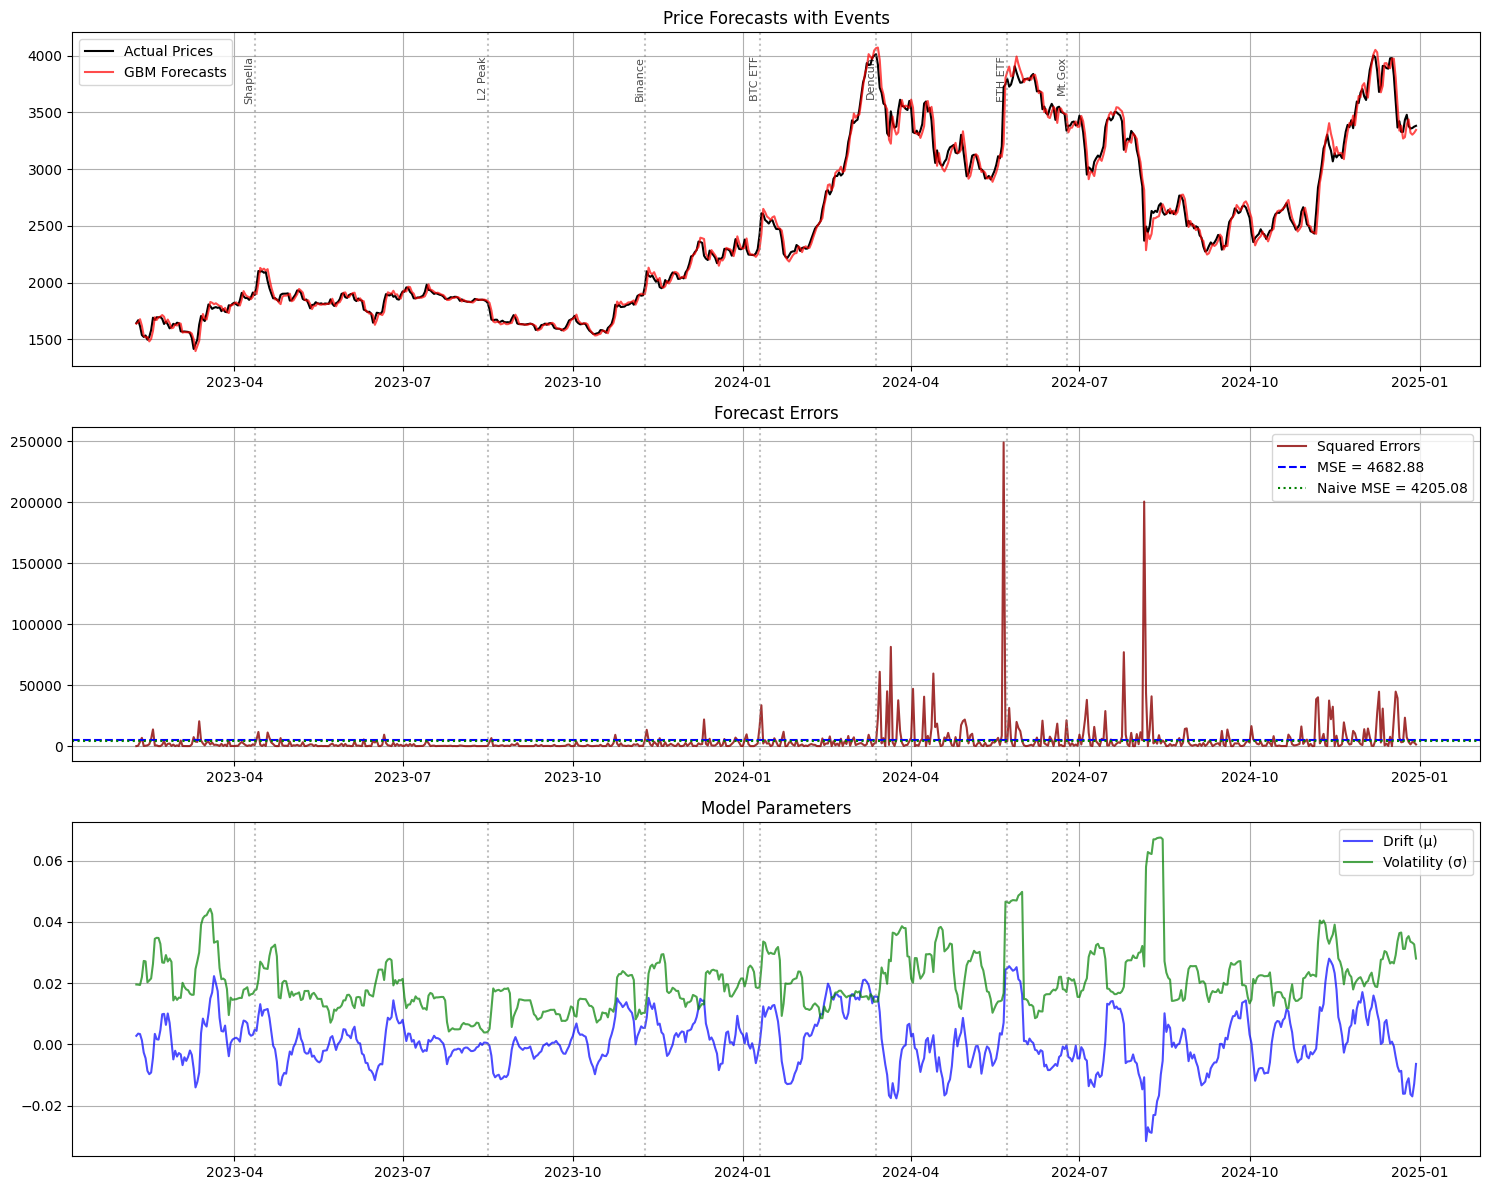

In [167]:
W = 10                  # Window size 
M = 500                 # Monte Carlo paths per day
alpha = 0.05            # for 90% CI
np.random.seed(42)      # reproducibility

# --- Initialize storage ---
errors = []
inside = []
actuals = []
forecasts = []
volatilities = []
drifts = []
dates = r.index[W:-1]

# --- Main backtest loop ---
for t in range(W, len(r)-1):
    try:
        # 1. Calibration window
        r_train = r.iloc[t-W:t]
        mu_hat = r_train.mean()
        sigma_hat = r_train.std(ddof=1)
        S_t = float(S.iloc[t])
        
        # Store model parameters
        drifts.append(mu_hat)
        volatilities.append(sigma_hat)
        
        # 2. Monte Carlo simulation
        Z = np.random.randn(M)
        S_fore = S_t * np.exp((mu_hat - 0.5*sigma_hat**2) + sigma_hat * Z)
        
        # 3. Forecast metrics
        mean_fore = S_fore.mean()
        lower = np.quantile(S_fore, alpha/2)
        upper = np.quantile(S_fore, 1-alpha/2)
        
        # 4. Record results
        S_actual = float(S.iloc[t+1])
        errors.append((mean_fore - S_actual)**2)
        inside.append(lower <= S_actual <= upper)
        actuals.append(S_actual)
        forecasts.append(mean_fore)
    except Exception as e:
        print(f"Error at t={t}: {str(e)}")
        break

# --- Performance metrics ---
if len(errors) > 0:
    mse = np.mean(errors)
    mae = np.mean(np.abs(np.sqrt(errors)))
    coverage = np.mean(inside)
else:
    raise ValueError("No errors calculated - check input data")

# --- Benchmark: Naive forecast ---
naive_errors = []
for t in range(W, len(r)-1):
    try:
        naive_errors.append((float(S.iloc[t]) - float(S.iloc[t+1]))**2)
    except:
        continue
naive_mse = np.mean(naive_errors) if naive_errors else float('nan')

# --- Visualization ---
plt.figure(figsize=(15, 12))

# Panel 1: Prices
plt.subplot(3, 1, 1)
plt.plot(dates, actuals, 'k-', label='Actual Prices')
plt.plot(dates, forecasts, 'r-', alpha=0.7, label='GBM Forecasts')



plt.title('Price Forecasts with Events')
plt.legend()
plt.grid()

# Panel 2: Errors
plt.subplot(3, 1, 2)
plt.plot(dates, errors, 'darkred', alpha=0.8, label='Squared Errors')
plt.axhline(mse, color='blue', ls='--', label=f'MSE = {mse:.2f}')
plt.axhline(naive_mse, color='green', ls=':', label=f'Naive MSE = {naive_mse:.2f}')



plt.title('Forecast Errors')
plt.legend()
plt.grid()

# Panel 3: Parameters
plt.subplot(3, 1, 3)
plt.plot(dates, drifts, 'b-', alpha=0.7, label='Drift (μ)')
plt.plot(dates, volatilities, 'g-', alpha=0.7, label='Volatility (σ)')
plt.title('Model Parameters')
plt.legend()
plt.grid()

event_dates = {
    'Shapella': '2023-04-12',
    'L2 Peak': '2023-08-16',
    'Binance': '2023-11-09',
    'BTC ETF': '2024-01-10',
    'Dencun': '2024-03-13',
    'ETH ETF': '2024-05-23',
    'Mt.Gox': '2024-06-24'
}

# Add to all three subplots
for ax in plt.gcf().axes:
    for event, date in event_dates.items():
        event_date = pd.to_datetime(date)
        ax.axvline(event_date, color='gray', linestyle=':', alpha=0.5)
        # Only label in the top plot to avoid clutter
        if ax == plt.gcf().axes[0]:
            ax.text(event_date, ax.get_ylim()[1]*0.95, event, 
                   rotation=90, fontsize=8, va='top', ha='right', alpha=0.7)

plt.tight_layout()
plt.show()


In [149]:
mu=r.mean()
sigma=r.std()


In [86]:
T      = 100      # days to simulate
N      = 1000     # number of Monte Carlo paths
dt     = 1.0      # time step = 1 day
S0     = 3363.754159  # start at today’s price

# 5) Simulate GBM paths
#   S_t = S0 * exp( (μ - 0.5σ²)t + σ W_t )
#   W_t = cumulative sum of sqrt(dt)*N(0,1)
rand = np.random.normal(0, 1, size=(T, N))
W    = np.cumsum(rand * np.sqrt(dt), axis=0)  # Brownian motion
time = np.arange(1, T+1)

drift = (mu - 0.5 * sigma**2) * time[:, None]
diffusion = sigma * W

paths = S0 * np.exp(drift + diffusion)

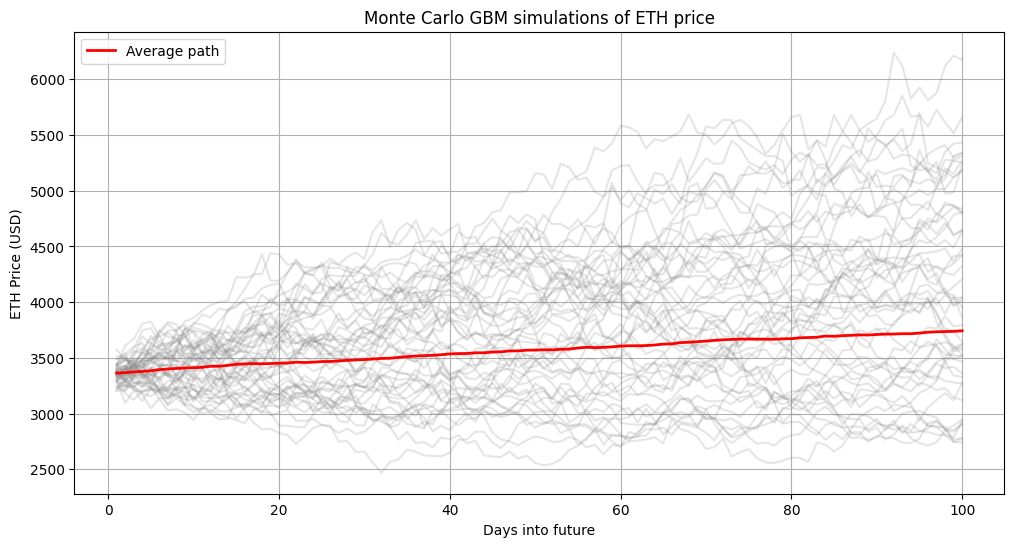

In [87]:
plt.figure(figsize=(12,6))
for i in range(50):  # plot only 50 of the 1000
    plt.plot(time, paths[:, i], color="gray", alpha=0.2)
plt.plot(time, paths.mean(axis=1), color="red", linewidth=2, label="Average path")
plt.title("Monte Carlo GBM simulations of ETH price")
plt.xlabel("Days into future")
plt.ylabel("ETH Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

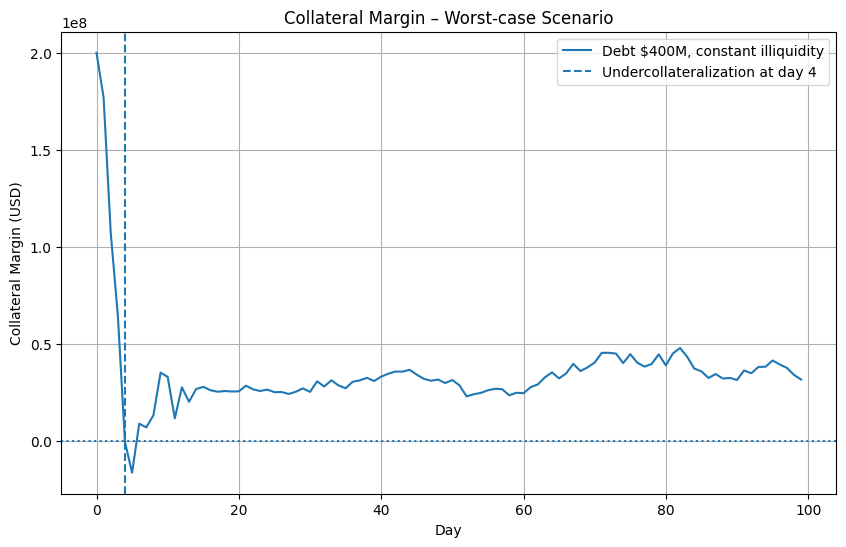

Worst-case undercollateralization at day 4 for debt $400M under 'constant' illiquidity.


In [129]:

import numpy as np
import matplotlib.pyplot as plt

# ── Adjusted Parameters ──
T       = 100      # days
N       = 1000     # Monte Carlo paths
dt      = 1.0      # one day
S0      = 3363.754159  # initial ETH price (USD)
mu      = 0.001592  # daily drift
sigma   = 0.08     # increased volatility to force defaults

# Generate correlated GBM price paths for ETH
rand = np.random.normal(0, 1, size=(T, N))
W = np.cumsum(rand * np.sqrt(dt), axis=0)
time = np.arange(1, T+1)[:, None]
drift = (mu - 0.5 * sigma**2) * time
diffusion = sigma * W
paths = S0 * np.exp(drift + diffusion)  # shape (T, N)

# Stress-test settings
debts       = [100e6, 200e6, 300e6, 400e6]  # USD
collat_ratio = 1.50                        # 150% initial collateralization
L0           = 10000                       # ETH/day initial liquidity
liq_params   = {'constant': 0.0, 'mild': 0.005, 'severe': 0.01}

# Find the global worst-case scenario
global_min_days = T + 1
global_info = None

for D0 in debts:
    eth_init = (D0 * collat_ratio) / paths[0]  # initial ETH units per sim

    for name, rho in liq_params.items():
        default_times = np.full(N, np.inf)

        for sim in range(N):
            debt = D0
            eth  = eth_init[sim]

            for t in range(T):
                price = paths[t, sim]
                collat = eth * price
                if collat < debt:
                    default_times[sim] = t
                    break

                # Sell up to decaying liquidity to repay debt
                L = L0 * np.exp(-rho * t)
                to_sell = min(eth, L, debt / price)
                debt -= to_sell * price
                eth  -= to_sell

        scenario_min = np.min(default_times)
        if scenario_min < global_min_days:
            global_min_days = scenario_min
            global_info = {
                'debt': D0,
                'liq': name,
                'rho': rho,
                'sim': int(np.argmin(default_times)),
                'day': int(scenario_min)
            }

# Recompute the margin curve for the worst-case path
info = global_info
D0 = info['debt']
rho = info['rho']
sim = info['sim']

eth_units = (D0 * collat_ratio) / paths[0, sim]
debt = D0
margin_curve = np.zeros(T)
for t in range(T):
    price = paths[t, sim]
    margin_curve[t] = eth_units * price - debt

    L = L0 * np.exp(-rho * t)
    sell = min(eth_units, L, debt / price)
    debt -= sell * price
    eth_units -= sell

# Plot the worst-case margin curve
plt.figure(figsize=(10, 6))
plt.plot(range(T), margin_curve,
         label=f'Debt ${D0/1e6:.0f}M, {info["liq"]} illiquidity')
plt.axvline(info['day'], linestyle='--',
            label=f'Undercollateralization at day {info["day"]}')
plt.axhline(0, linestyle=':')
plt.xlabel('Day')
plt.ylabel('Collateral Margin (USD)')
plt.title('Collateral Margin – Worst-case Scenario')
plt.legend()
plt.grid(True)
plt.show()

print(f"Worst-case undercollateralization at day {info['day']} "
      f"for debt ${info['debt']/1e6:.0f}M under '{info['liq']}' illiquidity.")

In [137]:
T          = 100      # days
N          = 1000     # Monte Carlo paths
dt         = 1.0      # one day
S0         = 3363.75  # initial ETH price (USD)
mu, sigma  = 0.001592, 0.08  # drift, volatility

# generate GBM paths
rand      = np.random.normal(size=(T, N))
W         = np.cumsum(rand * np.sqrt(dt), axis=0)
t         = np.arange(1, T+1)[:, None]
paths     = S0 * np.exp((mu - 0.5*sigma**2)*t + sigma*W)

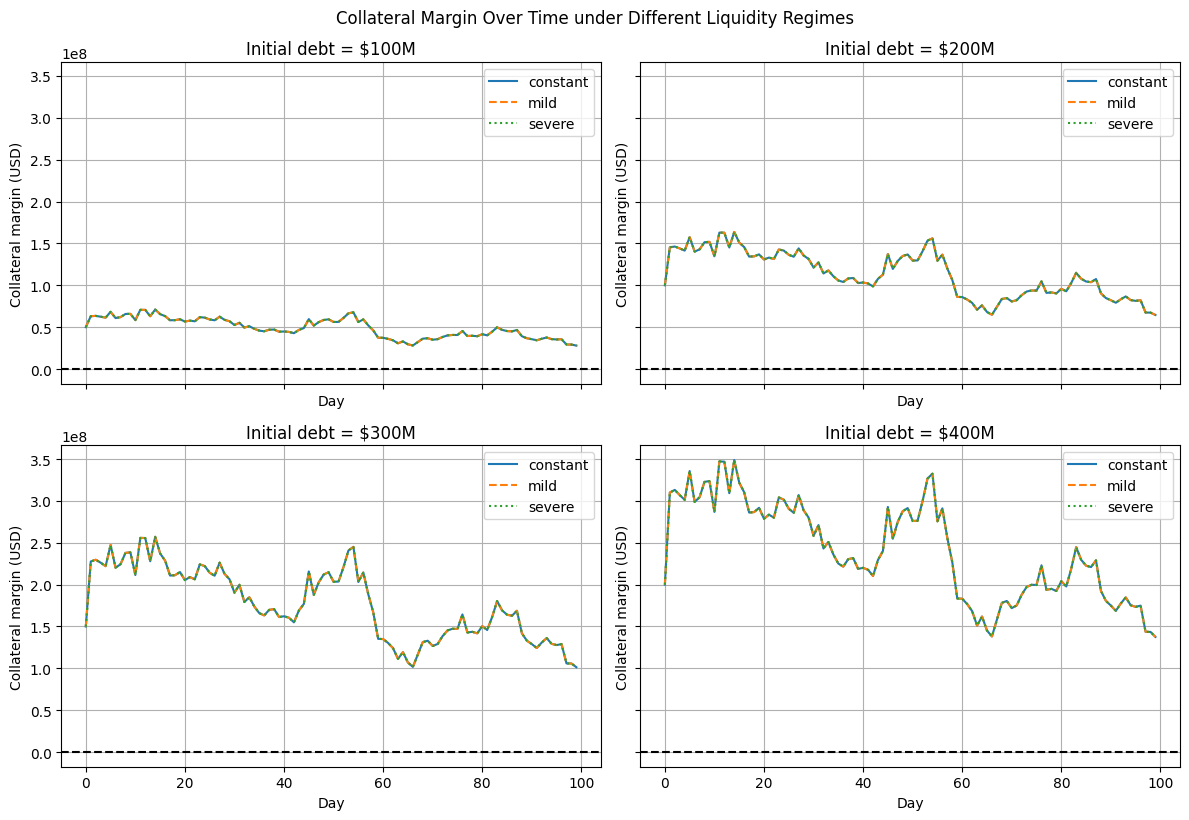

In [138]:
debts        = [100e6, 200e6, 300e6, 400e6]
collat_ratio = 1.5
L0           = 30000
liq_params   = {
    'constant': {'rho': 0.0,  'color':'C0', 'ls':'-'},
    'mild':     {'rho': 0.005,'color':'C1', 'ls':'--'},
    'severe':   {'rho': 0.01, 'color':'C2', 'ls':':'}
}

fig, axes = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, D0 in zip(axes, debts):
    eth0 = (D0 * collat_ratio) / paths[0]  # ETH units per sim

    for name, p in liq_params.items():
        rho = p['rho']
        default_times = np.full(N, np.inf)

        # find first default day per sim
        for sim in range(N):
            debt = D0
            eth  = eth0[sim]
            for day in range(T):
                price = paths[day, sim]
                if eth*price < debt:
                    default_times[sim] = day
                    break
                L = L0 * np.exp(-rho*day)
                sell = min(eth, L, debt/price)
                debt -= sell*price
                eth  -= sell

        worst = int(np.argmin(default_times))

        # recompute worst-case margin curve
        debt   = D0
        eth    = eth0[worst]
        margin = np.zeros(T)
        for day in range(T):
            price      = paths[day, worst]
            margin[day] = eth*price - debt
            L          = L0 * np.exp(-rho*day)
            sell       = min(eth, L, debt/price)
            debt      -= sell*price
            eth       -= sell

        ax.plot(
            np.arange(T),
            margin,
            label=f'{name}',
            color=p['color'],
            linestyle=p['ls']
        )

    ax.axhline(0, color='k', linestyle='--')
    ax.set_title(f'Initial debt = ${D0/1e6:.0f}M')
    ax.set_xlabel('Day')
    ax.set_ylabel('Collateral margin (USD)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Collateral Margin Over Time under Different Liquidity Regimes', y=1.02)
plt.show()




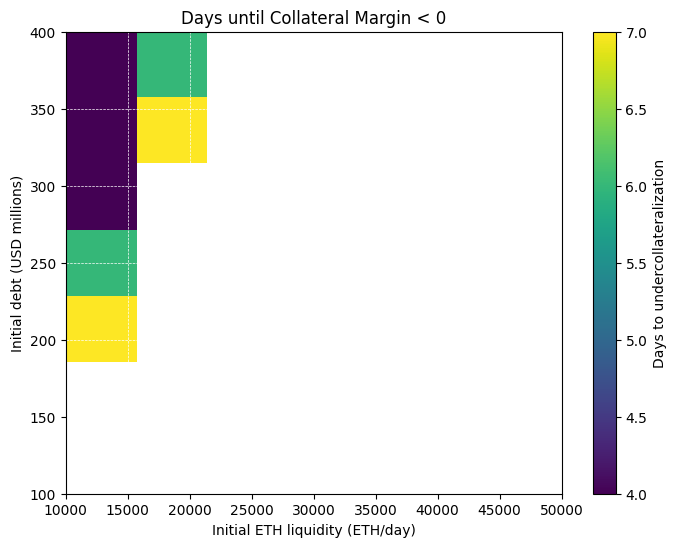

In [139]:
# ── Figure 2: Heatmap of days until undercollateralization ──
debts_grid = np.linspace(100e6, 400e6, 7)    # 7 different debt levels
L0_grid    = np.linspace(10000, 50000, 7)    # 7 different initial ETH liquidity levels
rho        = 0.005  # choose one liquidity-decay regime

days_to_default = np.zeros((len(debts_grid), len(L0_grid)))

for i, D0 in enumerate(debts_grid):
    eth_init = (D0 * collat_ratio) / paths[0]
    for j, L0_val in enumerate(L0_grid):
        default_times = np.full(N, np.inf)
        for sim in range(N):
            debt = D0
            eth  = eth_init[sim]
            for t in range(T):
                price = paths[t, sim]
                if eth * price < debt:
                    default_times[sim] = t
                    break
                L       = L0_val * np.exp(-rho * t)
                to_sell = min(eth, L, debt/price)
                debt   -= to_sell * price
                eth    -= to_sell
        days_to_default[i, j] = np.min(default_times)

plt.figure(figsize=(8, 6))
im = plt.imshow(days_to_default,
                origin='lower',
                aspect='auto',
                extent=[L0_grid[0], L0_grid[-1],
                        debts_grid[0]/1e6, debts_grid[-1]/1e6])
plt.colorbar(im, label='Days to undercollateralization')
plt.xlabel('Initial ETH liquidity (ETH/day)')
plt.ylabel('Initial debt (USD millions)')
plt.title('Days until Collateral Margin < 0')
plt.grid(color='w', linestyle='--', linewidth=0.5)
plt.show()

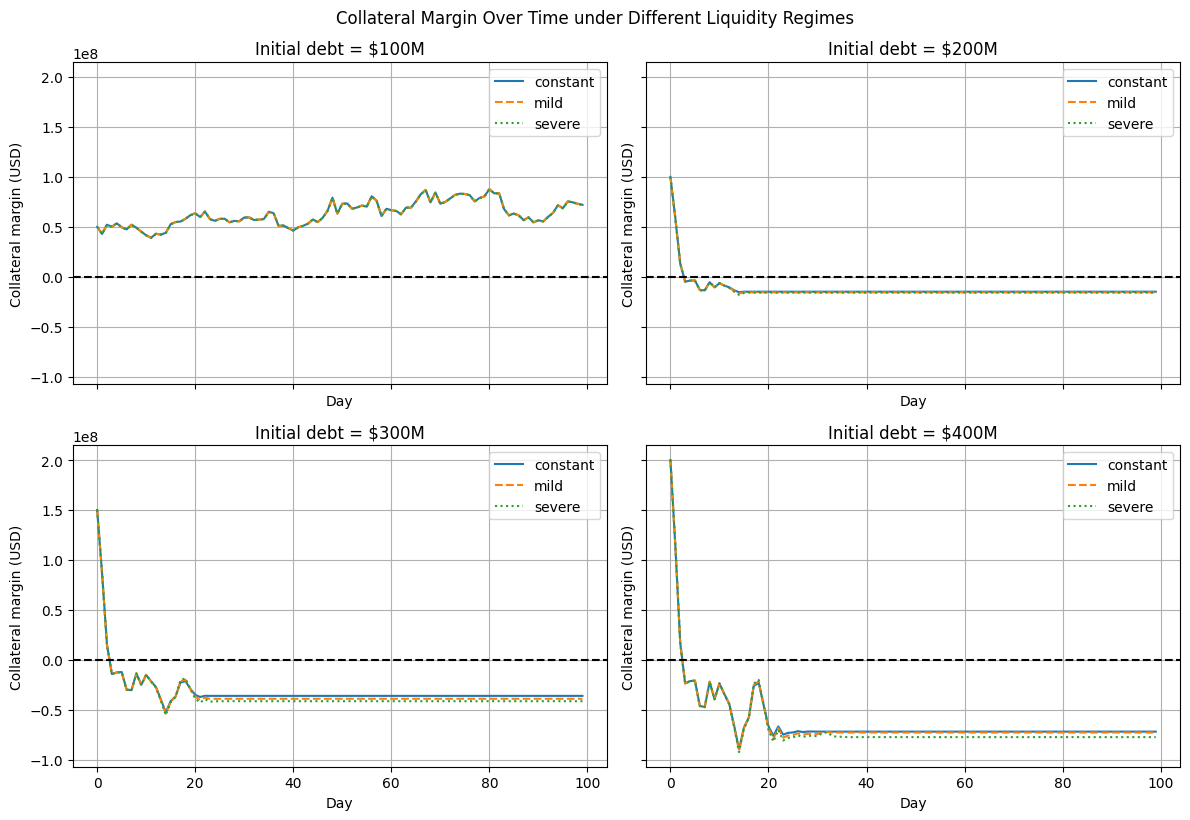

In [140]:
T          = 100      # days
N          = 1000     # Monte Carlo paths
dt         = 1.0      # one day
S0         = 3363.75  # initial ETH price (USD)
mu, sigma  = 0.001592, 0.08  # drift, volatility

# generate GBM paths
rand      = np.random.normal(size=(T, N))
W         = np.cumsum(rand * np.sqrt(dt), axis=0)
t         = np.arange(1, T+1)[:, None]
paths     = S0 * np.exp((mu - 0.5*sigma**2)*t + sigma*W)

debts        = [100e6, 200e6, 300e6, 400e6]
collat_ratio = 1.5
L0           = 5000
liq_params   = {
    'constant': {'rho': 0.0,  'color':'C0', 'ls':'-'},
    'mild':     {'rho': 0.005,'color':'C1', 'ls':'--'},
    'severe':   {'rho': 0.01, 'color':'C2', 'ls':':'}
}

fig, axes = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, D0 in zip(axes, debts):
    eth0 = (D0 * collat_ratio) / paths[0]  # ETH units per sim

    for name, p in liq_params.items():
        rho = p['rho']
        default_times = np.full(N, np.inf)

        # find first default day per sim
        for sim in range(N):
            debt = D0
            eth  = eth0[sim]
            for day in range(T):
                price = paths[day, sim]
                if eth*price < debt:
                    default_times[sim] = day
                    break
                L = L0 * np.exp(-rho*day)
                sell = min(eth, L, debt/price)
                debt -= sell*price
                eth  -= sell

        worst = int(np.argmin(default_times))

        # recompute worst-case margin curve
        debt   = D0
        eth    = eth0[worst]
        margin = np.zeros(T)
        for day in range(T):
            price      = paths[day, worst]
            margin[day] = eth*price - debt
            L          = L0 * np.exp(-rho*day)
            sell       = min(eth, L, debt/price)
            debt      -= sell*price
            eth       -= sell

        ax.plot(
            np.arange(T),
            margin,
            label=f'{name}',
            color=p['color'],
            linestyle=p['ls']
        )

    ax.axhline(0, color='k', linestyle='--')
    ax.set_title(f'Initial debt = ${D0/1e6:.0f}M')
    ax.set_xlabel('Day')
    ax.set_ylabel('Collateral margin (USD)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Collateral Margin Over Time under Different Liquidity Regimes', y=1.02)
plt.show()



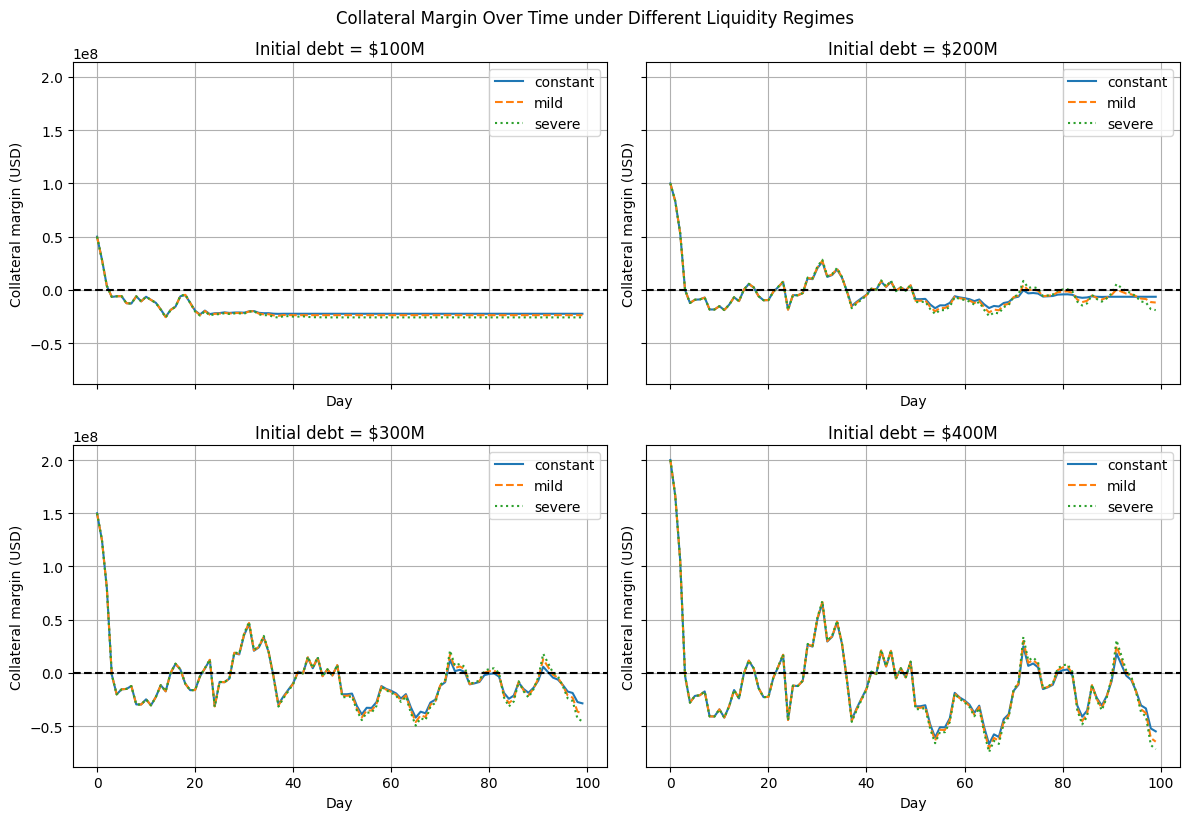

In [143]:
debts        = [100e6, 200e6, 300e6, 400e6]
collat_ratio = 1.5
L0           = 1000
liq_params   = {
    'constant': {'rho': 0.0,  'color':'C0', 'ls':'-'},
    'mild':     {'rho': 0.005,'color':'C1', 'ls':'--'},
    'severe':   {'rho': 0.01, 'color':'C2', 'ls':':'}
}

fig, axes = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, D0 in zip(axes, debts):
    eth0 = (D0 * collat_ratio) / paths[0]  # ETH units per sim

    for name, p in liq_params.items():
        rho = p['rho']
        default_times = np.full(N, np.inf)

        # find first default day per sim
        for sim in range(N):
            debt = D0
            eth  = eth0[sim]
            for day in range(T):
                price = paths[day, sim]
                if eth*price < debt:
                    default_times[sim] = day
                    break
                L = L0 * np.exp(-rho*day)
                sell = min(eth, L, debt/price)
                debt -= sell*price
                eth  -= sell

        worst = int(np.argmin(default_times))

        # recompute worst-case margin curve
        debt   = D0
        eth    = eth0[worst]
        margin = np.zeros(T)
        for day in range(T):
            price      = paths[day, worst]
            margin[day] = eth*price - debt
            L          = L0 * np.exp(-rho*day)
            sell       = min(eth, L, debt/price)
            debt      -= sell*price
            eth       -= sell

        ax.plot(
            np.arange(T),
            margin,
            label=f'{name}',
            color=p['color'],
            linestyle=p['ls']
        )

    ax.axhline(0, color='k', linestyle='--')
    ax.set_title(f'Initial debt = ${D0/1e6:.0f}M')
    ax.set_xlabel('Day')
    ax.set_ylabel('Collateral margin (USD)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Collateral Margin Over Time under Different Liquidity Regimes', y=1.02)
plt.show()

